# 8. Matplotlib
------------------------------------------------------

## Matplotlib - Graficador en 2D y 3D de Python

Matplotlib es una excelente biblioteca de gráficos 2D y 3D para generar imágenes científicas. Algunas de las muchas ventajas de esta biblioteca incluyen:

- Fácil de aprender
- Soporte para etiquetas y textos con formato LATEX
- Gran control de cada elemento en una figura, incluyendo el tamaño de la cara y el DPI.
- Gran calidad de formatos de salida como PNG, PDF, SVG, EPS, y la PGF.
- GUI para explorar figuras de forma interactiva 
- Una de las características clave de matplotlib que me gustaría destacar, y que creo que hace matplotlib muy adecuado para la generación de gráficas para las publicaciones científicas es que todos los aspectos de la figura se pueden controlar mediante programación.

Más información en la página web de Matplotlib: http://matplotlib.org/

Para comenzar a usar Matplotlib en un programa Python, incluya los símbolos del módulo pylab (la forma más sencilla):

In [1]:
# Esta línea configura matplotlib para mostrar las figuras incrustadas en el jupyter notebook
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12, 10)

Veamos un ejemplo:

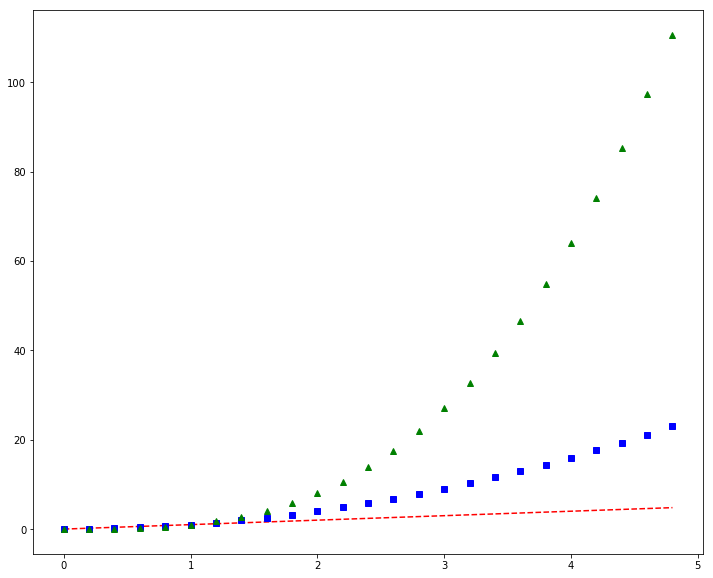

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### La API orientada a objetos Matplotlib

La idea principal con la programación orientada a objetos es tener objetos en los que se puedan aplicar funciones y acciones, y que ningún objeto o estado de programa debe ser global (como el API de MATLAB). La ventaja real de este enfoque se hace evidente cuando se crea más de una figura, o cuando una figura contiene más de una subfigura.

Para usar la API orientada a objetos empezamos de una manera muy parecida al ejemplo anterior, pero en vez de crear una nueva instancia de figura global almacenamos una referencia a la instancia de figura recién creada en la variable fig, y de ella creamos un nuevo eje de instancia axes utilizando el método add_axes en la instancia de clase Figure fig:

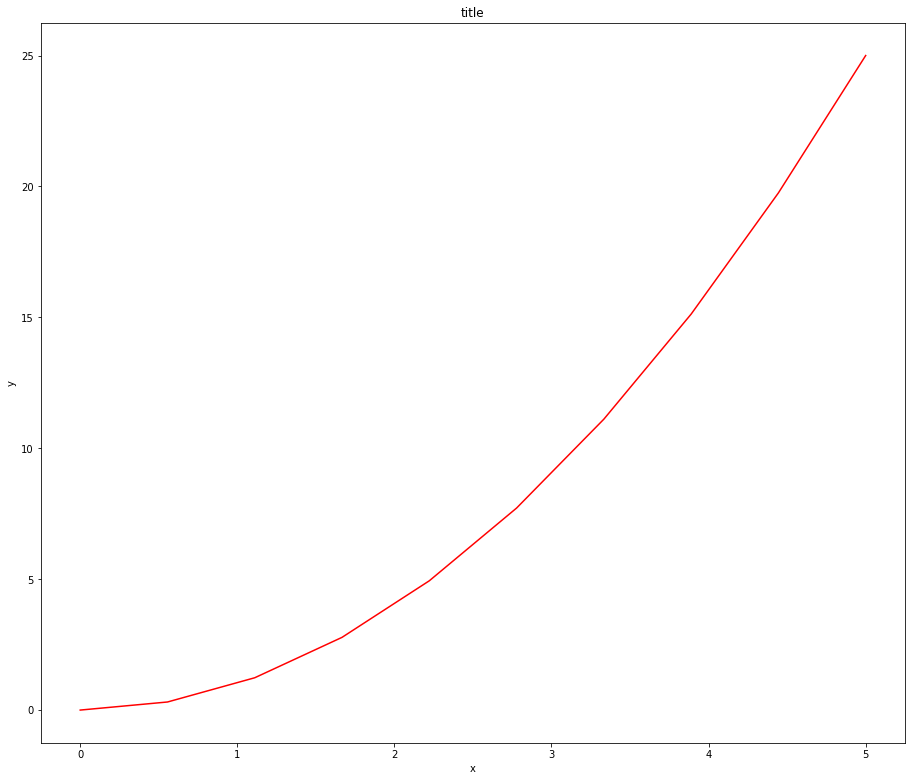

In [4]:
fig = plt.figure()

x = np.linspace(0, 5, 10)
y = x ** 2

axes = fig.add_axes([0.1, 0.1, 1, 1]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Tambien podemos definir una función y pasarle los argumentos

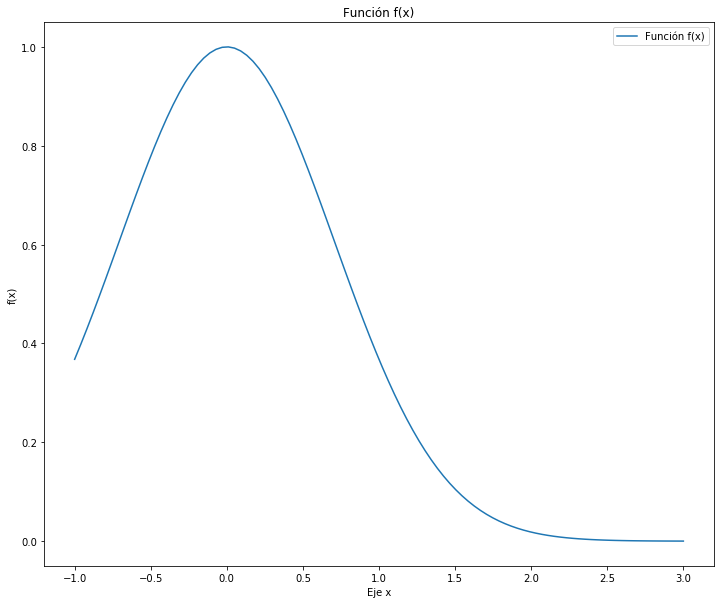

In [5]:
def f(x):
    return np.exp(-x ** 2)

x = np.linspace(-1, 3, 100)

plt.plot(x, f(x), label="Función f(x)")
plt.xlabel("Eje x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Función f(x)")

Tambien podemos trabajar con múltiples gráficas:

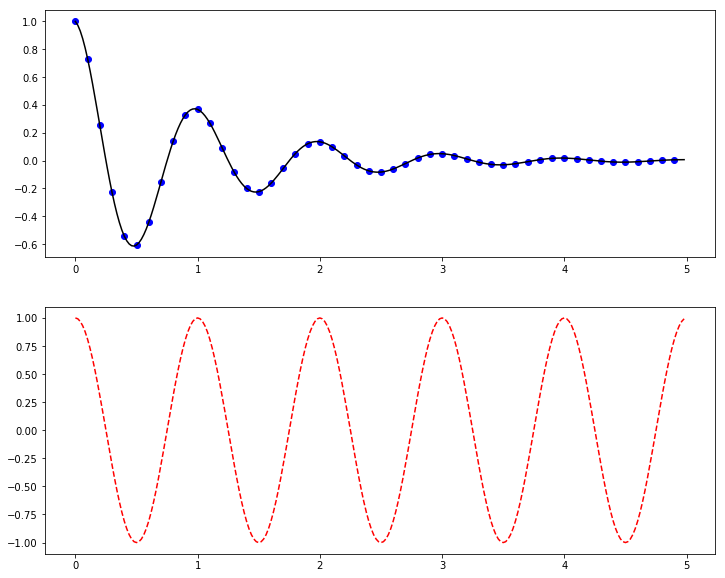

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Aunque usamos un poco más de código, la ventaja es que ahora tenemos el control total de donde se colocan los ejes de la figura, y podemos agregar fácilmente más de un eje a la figura:

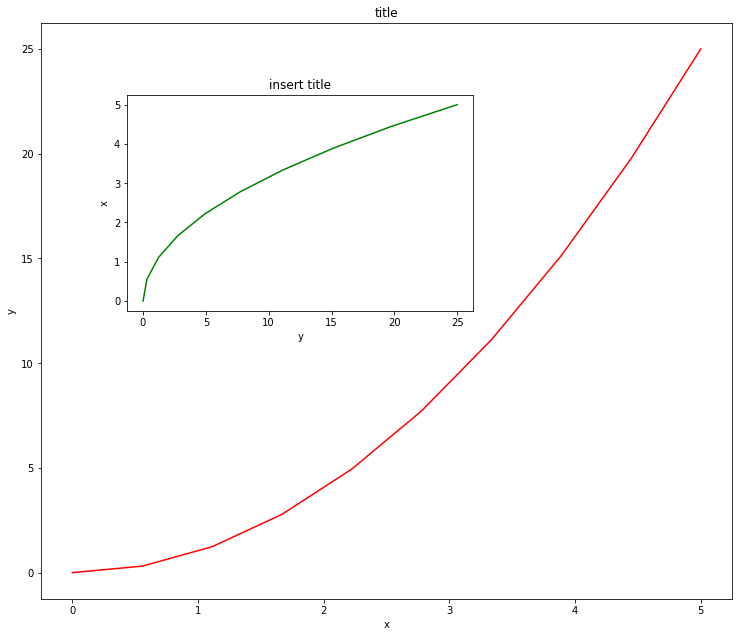

In [7]:
fig = plt.figure()

x = np.linspace(0, 5, 10)
y = x ** 2

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Figura principal
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# Figura insertada
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

### Tamaño de la figura, relación de aspecto y DPI

Matplotlib permite que la relación de aspecto, DPI y el tamaño de la figura se especifique cuando se crea el objeto de la figura, utilizando los argumentos de palabras clave **figsize y dpi**. Figsize es una tupla de la anchura y altura de la figura en pulgadas, y dpi es el punto por pulgada (píxel por pulgada). Para crear una figura de 800x400 pixeles, 100 dots-per-inch, podemos hacer:

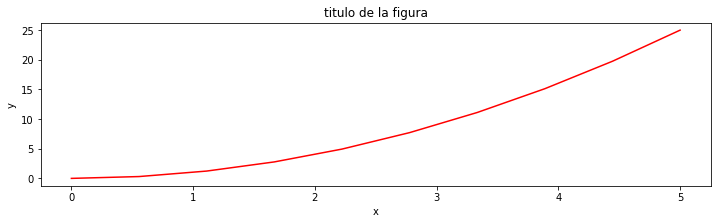

In [8]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('titulo de la figura');

### Guardando imágenes

Para guardar una figura en un archivo, podemos usar el método savefig de la clase Figure:

In [9]:
fig.savefig("filename.png")

Aquí también podemos especificar opcionalmente el DPI y elegir entre diferentes formatos de salida:

In [10]:
fig.savefig("filename.png", dpi=200)

¿Qué formatos están disponibles y cuáles deben utilizarse para obtener la mejor calidad? 

Matplotlib puede generar salida de alta calidad en un número de formatos, incluyendo PNG, JPG, EPS, SVG, PGF y PDF. Para trabajos científicos, recomiendo usar PDF siempre que sea posible. (Los documentos LaTeX compilados con pdflatex pueden incluir archivos PDF usando el comando includegraphics). En algunos casos, PGF también puede ser una buena alternativa.



### Leyendas, etiquetas y títulos

Ahora que hemos cubierto los conceptos básicos de cómo crear un lienzo de la figura y añadir ejes instancias al lienzo, veamos cómo decorar una figura con títulos, etiquetas de eje y leyendas.



#### Tituo de la figura

Se puede añadir un título a cada instancia de eje de una figura. Para establecer el título, utilice el método **set_title** en la instancia de los ejes:

In [ ]:
ax.set_title("title")

#### Etiquetas de ejes

Del mismo modo, con los métodos set_xlabel y set_ylabel, podemos establecer las etiquetas de los ejes X e Y:

In [ ]:
ax.set_xlabel("x")
ax.set_ylabel("y");

#### Leyendas

Las leyendas para curvas en una figura se pueden agregar de dos maneras. Un método consiste en utilizar el método de leyenda del objeto de eje y pasar una lista/tupla de textos de leyenda para las curvas previamente definidas:

In [ ]:
ax.legend(["curve1", "curve2", "curve3"]);

La función de leyenda toma un argumento de palabra clave **loc** que puede usarse para especificar dónde en la figura se va a dibujar la leyenda. Los valores permitidos de loc son códigos numéricos para los distintos lugares donde se puede dibujar la leyenda. Vea http://matplotlib.org/users/legend_guide.html#legend-location para más detalles. Algunos de los valores de localización más comunes son:

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

Veamos un ejemplo:

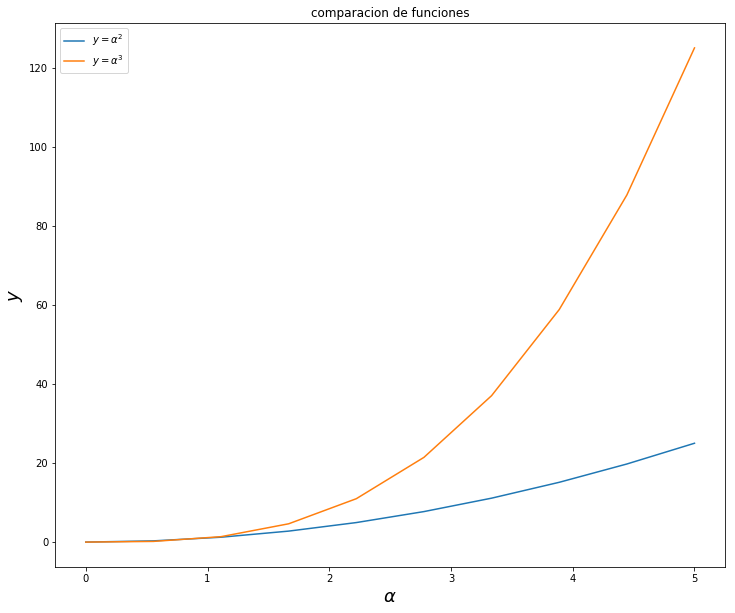

In [11]:
x = np.linspace(0, 5, 10)
fig, ax = plt.subplots()

# Podemos usar latex para nuestras leyendas y etiquetas de ejes incluso en el titulo
ax.plot(x, x**2, label=r"$y = \alpha^2$") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('comparacion de funciones');

### Colores y tipos de marcadores de linea

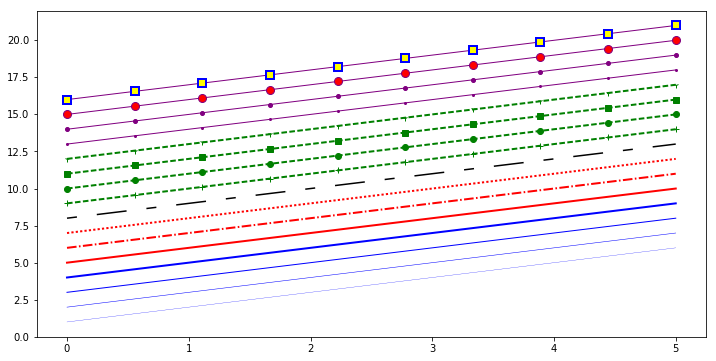

In [12]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# Opciones posibles de linestype  ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
# lw = linewidth
# ls = linestyle
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# Guión personalizado
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# Posibles simbolos de marcador = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# Tamaño y color del marcador
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Rango de trazado de figuras

Lo primero que queremos configurar son los rangos de los ejes. Podemos hacerlo usando los métodos set_ylim y set_xlim en el eje objeto, o el eje ('tight') para obtener automáticamente los rangos de ejes "herméticamente ajustados":

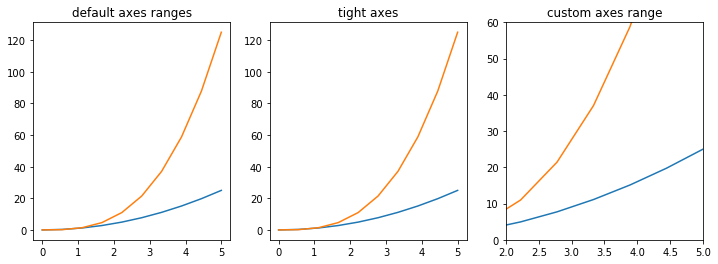

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

## Cuadrícula del eje

With the grid method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function:

Con el método de cuadrícula en el objeto de eje, podemos activar y desactivar líneas de cuadrícula. También podemos personalizar la apariencia de las líneas de cuadrícula usando los mismos argumentos de palabras clave que la función plot().

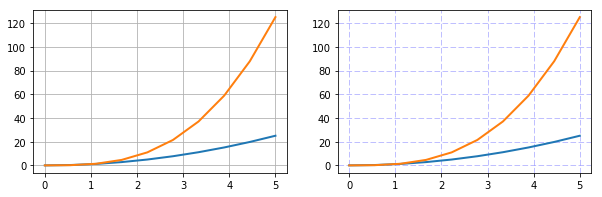

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Otras estilos de figuras 2D 

Además del método de graficado regular, hay una serie de otras funciones para generar diferentes tipos de figuras. Vea la galería matplotlib para una lista completa de los tipos de trama disponibles: http://matplotlib.org/gallery.html. Algunos de los más útiles se muestran a continuación:

## Histogramas

In [15]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randint(0,100,100)
data

array([88, 78, 12, 87, 90, 82, 55, 22, 27, 17, 30, 67, 80, 32, 33, 83, 97,
        8, 94, 91, 32, 13, 37, 53, 60, 73, 73, 71, 95,  7, 94, 40, 18, 59,
        8, 26, 33,  7, 72, 23, 22, 34, 45,  5, 66, 10, 92, 12, 29, 30, 60,
       68, 18, 95, 13, 54, 18, 89, 88, 48, 72, 65, 15, 48, 75, 45, 86, 80,
       50, 88, 26, 43, 29,  3,  1, 47, 46, 62, 76, 53, 21, 82, 40,  6, 44,
       71, 94, 68, 67, 94, 95, 61, 45, 11, 21, 20, 71,  0, 65, 93])

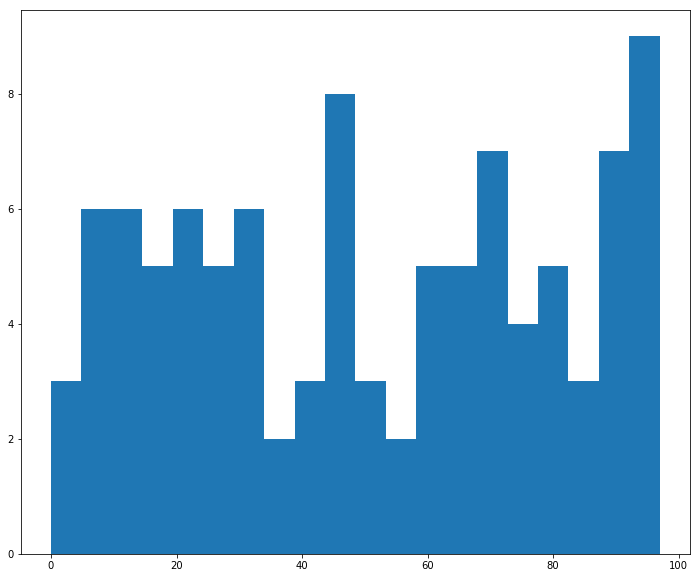

In [16]:
# Ahora, cree el histograma de estas muestras pasando como un argumento 
# del hist (). función. Por ejemplo, desea dividir las ocurrencias en 20 bins 

n,bins,patches =plt.hist(data,bins=20)

## Gráficos de Barras (Bar char)

<Container object of 5 artists>

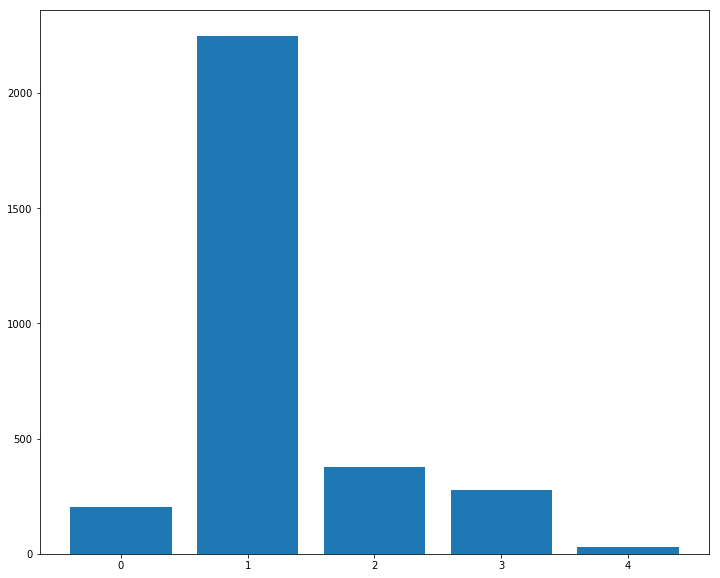

In [17]:
import matplotlib.pyplot as plt
index = [0,1,2,3,4]
values = [202,2246,378,277,30]
plt.bar(index,values)

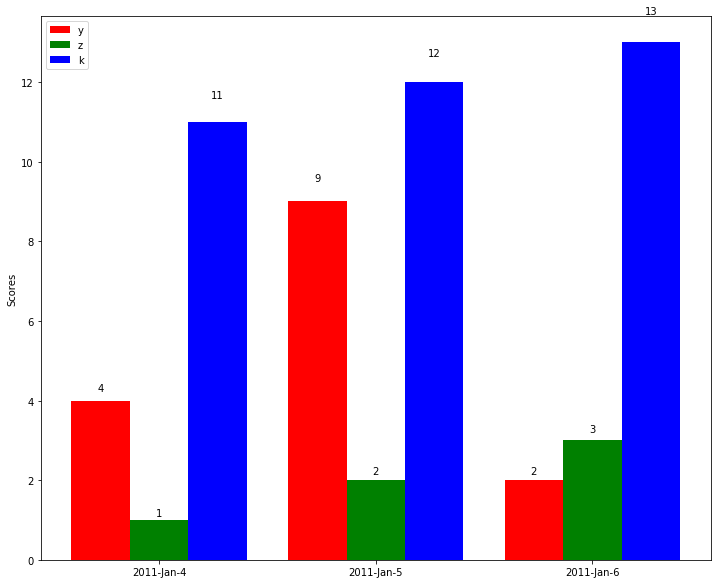

In [18]:
ind = np.arange(3)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

## Piecharts

(-1.11637372803214,
 1.1007797090739162,
 -1.1163737124158366,
 1.1007797083302826)

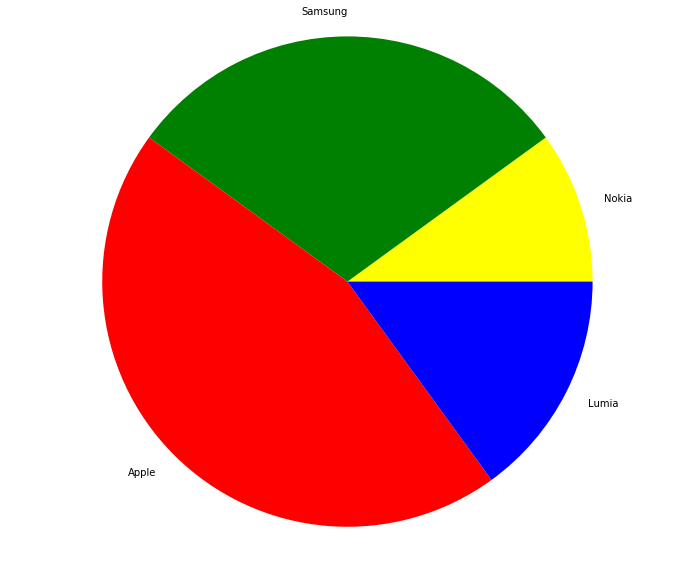

In [19]:
import matplotlib.pyplot as plt
labels = ['Nokia','Samsung','Apple','Lumia']
values = [10,30,45,15]
colors = ['yellow','green','red','blue']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')

## Mapas de Contorno

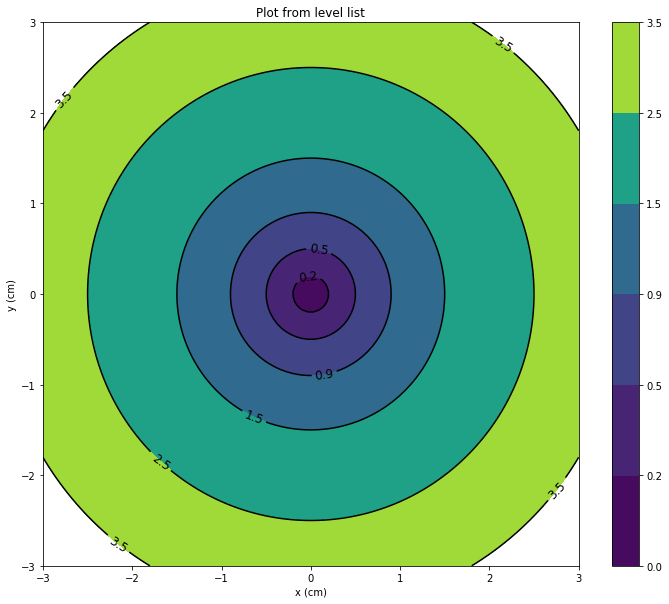

In [24]:
import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X ** 2 + Y ** 2 )
plt.figure()
levels = [0.0, 0.2, 0.5, 0.9, 1.5, 2.5, 3.5]
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Z, levels)
plt.colorbar(contour_filled)
plt.title('Plot from level list')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

## Grid de figuras

Para crear subplots es muy sencillo usando __subplots()__ para añadirlos dividiendo una parcela en sectores. Matplotlib le permite gestionar casos aún más complejos utilizando otra función llamada __GridSpec()__. Esta subdivisión permite dividir el área de dibujo en una cuadrícula de subfiguras, a la que puede asignar uno o más de cada subplot, de manera que al final se pueden obtener subplots con diferentes tamaños y orientaciones, como se puede ver en el ejemplo:

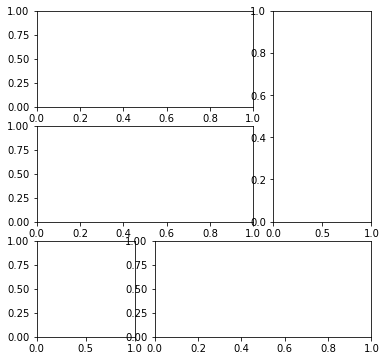

In [25]:
import matplotlib.pyplot as plt
gs = plt.GridSpec(3,3)
fig = plt.figure(figsize=(6,6))
fig.add_subplot(gs[1,:2])
fig.add_subplot(gs[0,:2])
fig.add_subplot(gs[2,0])
fig.add_subplot(gs[:2,2])
fig.add_subplot(gs[2,1:])

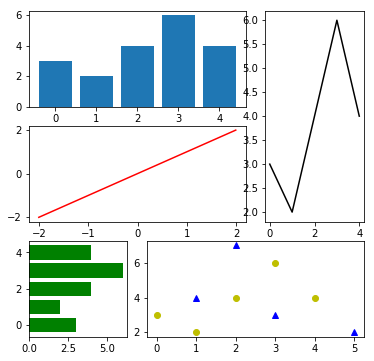

In [26]:
import matplotlib.pyplot as plt
import numpy as np

gs = plt.GridSpec(3,3)
fig = plt.figure(figsize=(6,6))

x1 = np.array([1,3,2,5])
y1 = np.array([4,3,7,2])

x2 = np.arange(5)
y2 = np.array([3,2,4,6,4])

s1 = fig.add_subplot(gs[1,:2])
s1.plot(x,y,'r')

s2 = fig.add_subplot(gs[0,:2])
s2.bar(x2,y2)

s3 = fig.add_subplot(gs[2,0])
s3.barh(x2,y2,color='g')

s4 = fig.add_subplot(gs[:2,2])
s4.plot(x2,y2,'k')

s5 = fig.add_subplot(gs[2,1:])
s5.plot(x1,y1,'b^',x2,y2,'yo')

Resumen de figuras

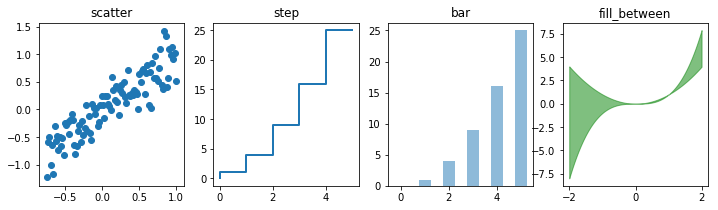

In [27]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)


fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

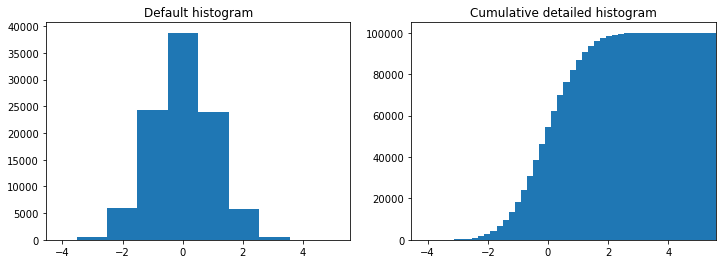

In [28]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

## Figuras en 3D

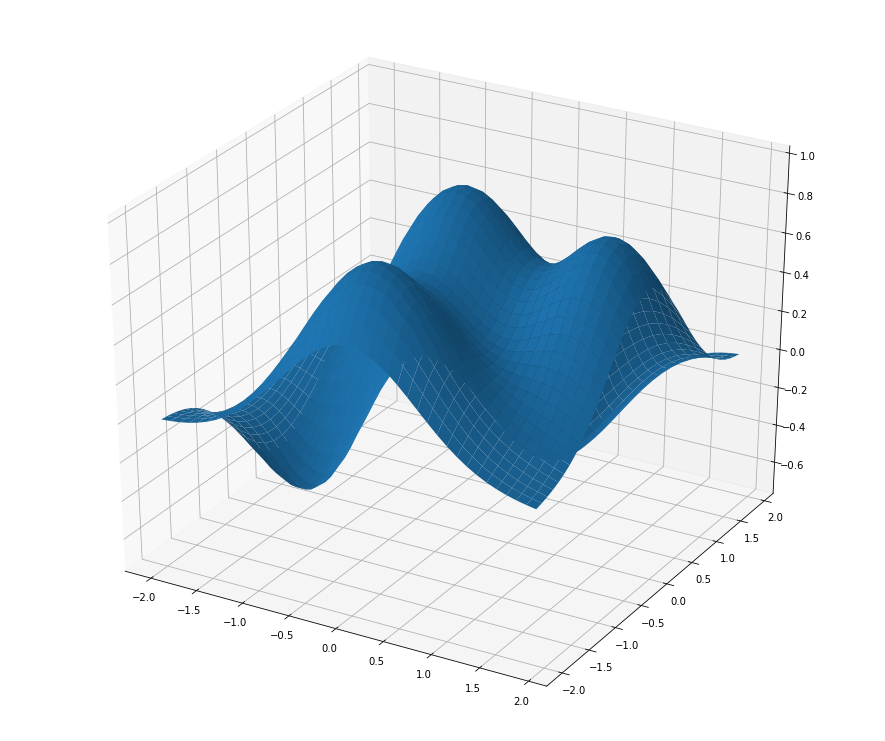

In [29]:
from mpl_toolkits.mplot3d import Axes3D
 
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-2,2,0.1)
Y = np.arange(-2,2,0.1)
X,Y = np.meshgrid(X,Y)

def f(x,y):
    return (1 - y**5 + x**5)*np.exp(-x**2-y**2)

ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1)

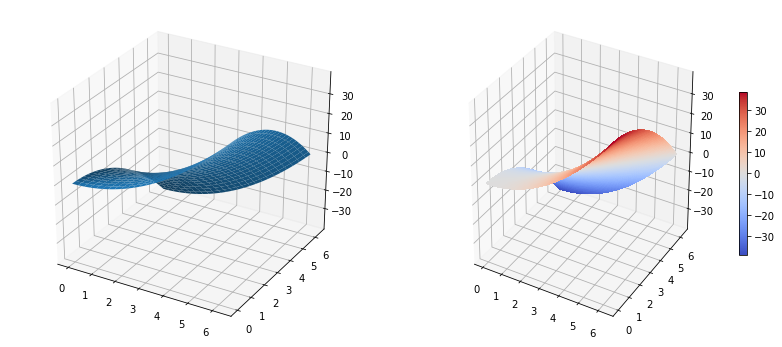

In [30]:
# Figuras en 3D

import matplotlib
from mpl_toolkits.mplot3d.axes3d import Axes3D

def f(x, y):
    return x ** 2 - y ** 2

x_l = np.linspace(0, 2*np.pi, 100)
y_l = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(x_l, y_l)

Z = f(X, Y)

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

## Imagenes

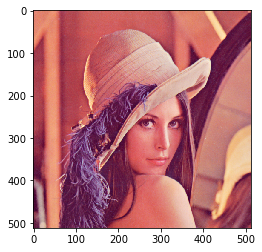

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../images/Lenna.png')

plt.imshow(img)

plt.show()

# Seaborn 

Seaborn es una biblioteca de visualización de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos. 

Para una breve introducción a las ideas detrás del paquete, puede leer las [notas introductorias](https://seaborn.pydata.org/introduction.html#introduction). Más información práctica está en la [página de instalación](https://seaborn.pydata.org/installing.html#installing). También puede explorar la [galería de ejemplos](https://seaborn.pydata.org/examples/index.html#example-gallery) para obtener una idea de lo que puede hacer con Seaborn y, a continuación, consulte el [tutorial](https://seaborn.pydata.org/tutorial.html#tutorial) y la referencia de la [API](https://seaborn.pydata.org/api.html#api-ref) para saber cómo funciona.

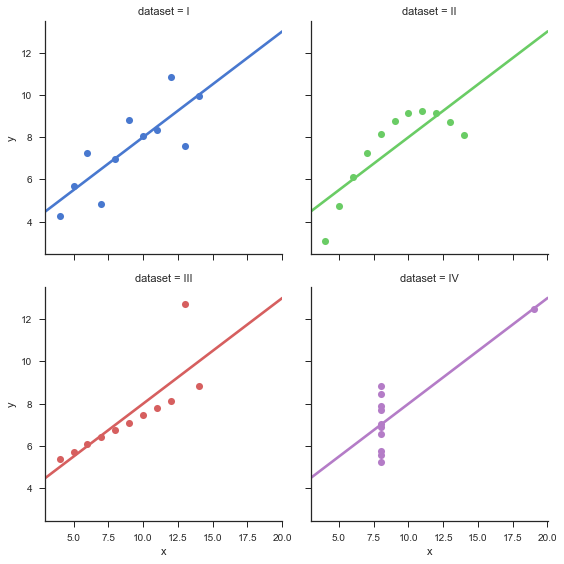

In [36]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

C:\Users\Gerson\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


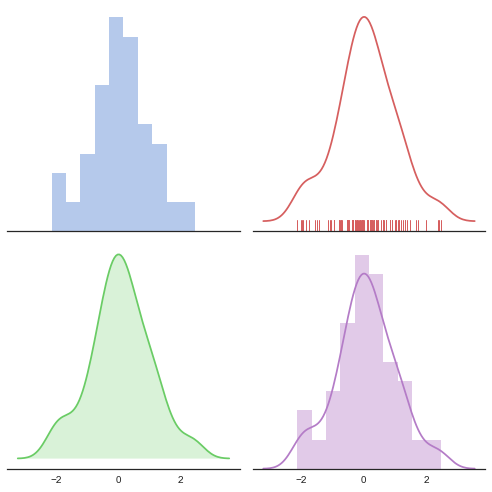

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

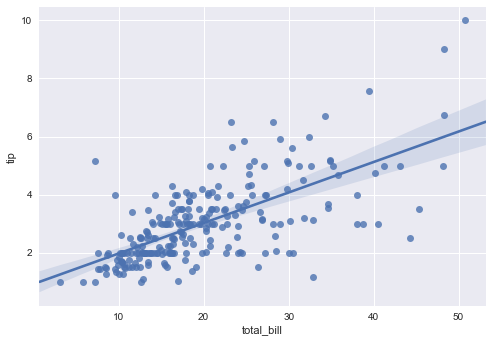

In [32]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

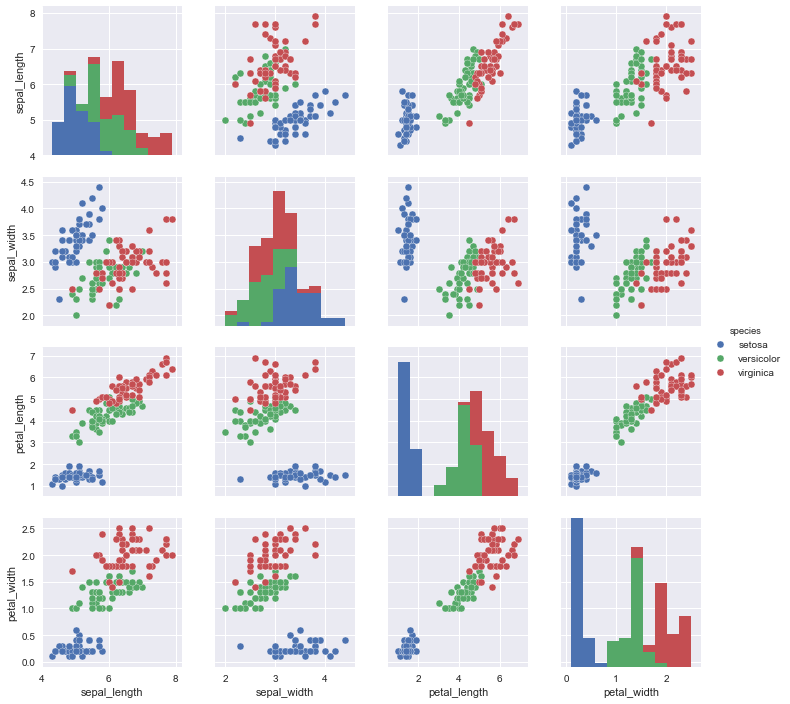

In [34]:
# Scatterplot Matrix

import seaborn as sns
sns.set()

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

### Usando Seaborn para visualizar un dataframe de Pandas

In [38]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

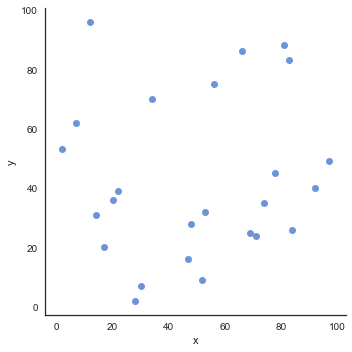

In [42]:
# Scatterplot

sns.lmplot('x', 'y', data=df, fit_reg=False)

C:\Users\Gerson\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


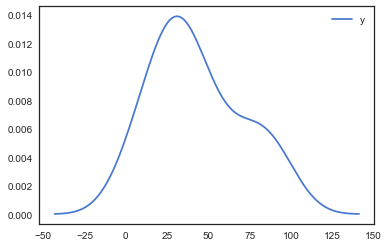

In [43]:
# Density Plot

sns.kdeplot(df.y)

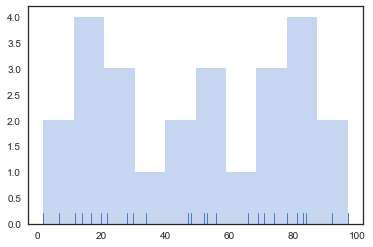

In [46]:
# Histogram

plt.hist(df.x, alpha=.3)
sns.rugplot(df.x);

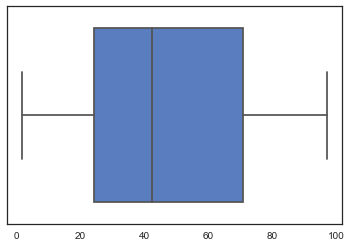

In [47]:
# Boxplot

sns.boxplot([df.y, df.x])

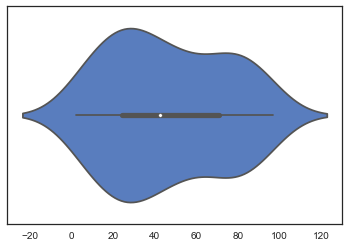

In [48]:
#Violin Plot
sns.violinplot([df.y, df.x])

In [31]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/StyleCursoPython.css'
HTML(open(css_file, "r").read())